<a href="https://colab.research.google.com/github/LuciferLuzbeL/DataScienceI/blob/main/Proyecto_Final_videojuegos_steam_nicolas_prado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final Nicolas Prado**

# **VideoJuegos Steam**

# **Instalacion**

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from matplotlib import pyplot as plt
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install xgboost

In [ ]:
pip install seaborn

# **Hipótesis**:
**En los últimos años, el tiempo de los juegos gratuitos ha aumentado rápidamente mas que el de los juegos de pago, ya que las mecánicas de monetización de los juegos gratuitos, como las microtransacciones y el contenido adicional, incentivan a los jugadores a pasar más tiempo en el juego.**

# **Preguntas**

* ¿Qué impacto tiene el precio de un videojuego en su tiempo de juego, y cómo se compara esto entre los videojuegos gratuitos y de pago?

    1. La lógica sugiere que los Videojuegos gratuitos podrían incentivar un mayor tiempo de juego debido a las mecánicas de monetización mencionadas. Sin embargo, es importante considerar factores como la calidad del juego base, la frecuencia de las actualizaciones y la diversidad de las opciones de personalización.

    2. El tiempo de juego en Videojuegos de pago podría estar influenciado por la duración de la campaña principal, la cantidad de contenido adicional y la complejidad del Videojuego. Mientras más largos y con mayor rejugabilidad podrían incentivar un mayor tiempo de juego.

* ¿Los videojuegos gratuitos han visto un aumento en el tiempo de juego promedio en comparación con los juegos de pago en los últimos años?

    1. Un análisis de los datos de tiempo de juego a lo largo de los años podría revelar si existe una tendencia ascendente en los juegos gratuitos en comparación con los de pago.

    2. Es importante considerar factores externos como el aumento de la potencia de los dispositivos, la mayor disponibilidad de internet y los cambios en los hábitos de consumo de los jugadores.

* ¿Hay un patrón temporal en la popularidad de los videojuegos gratuitos frente a los juegos de pago en términos de tiempo de juego?

    1. Los Videojuegos, tanto gratuitos como de pago, tienen ciclos de vida. Es posible que los juegos gratuitos experimenten picos de popularidad al inicio debido a su lanzamiento, mientras que los juegos de pago pueden tener una curva de popularidad más estable a lo largo del tiempo.

    2. Algunos géneros, como los MMOs y los battle royale, son predominantemente gratuitos y podrían mostrar patrones de tiempo de juego diferentes a otros géneros.

* ¿Cómo varía el tiempo de juego promedio entre videojuegos gratuitos y de pago a lo largo del tiempo?

    1. Es importante considerar las características de los jugadores, como la edad, el género y los hábitos de juego, ya que podrían influir en el tiempo que dedican a cada tipo de Videojuego.

# **Propuesta de Analisis**

**Recopilar datos sobre el tiempo promedio que los jugadores dedican a diferentes juegos, tanto gratuitos como de pago.**
**Juntar Informacion sobre:**

* El genero
* El año de lanzamiento
* Las mecanicas de monetizacion y otras caracteristicas relevantes

**Recopilar informacion sobre la edad, el genero y el precio.**
**Calcular el tiempo de juego, promedio para juegos gratuitos y de pago.**
**Comparar la distribucion del tiempo de juego entre ambos tipos de juego.**

* Identificar los generos

**Analizar como ha evolucionado el tiempo de juego a lo largo del tiempo para ambos tipos de juego.**
**Identificar tendencias y puntos de inflexcion.**
**Explorar la relacion entre el tiempo de juego y otras variables, como el precio, la complejidad del juego y las caracteristicas de los jugadores.**


# **DataSet Steam Games**

**Se utilizo la siguiente base de datos:** " https://www.kaggle.com/datasets/fronkongames/steam-games-dataset "

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/games.csv")

# **Borrado de Columnas**

In [ ]:
df = df.drop(['Movies', 'Support url', 'Website', 'Header image', 'Screenshots', 'Support email'], axis=1)


In [ ]:
print(df.head())

     AppID                   Name  Release date Estimated owners  Peak CCU  \
0    20200       Galactic Bowling  Oct 21, 2008        0 - 20000         0   
1   655370           Train Bandit  Oct 12, 2017        0 - 20000         0   
2  1732930           Jolt Project  Nov 17, 2021        0 - 20000         0   
3  1355720               Henosis™  Jul 23, 2020        0 - 20000         0   
4  1139950  Two Weeks in Painland   Feb 3, 2020        0 - 20000         0   

   Required age  Price  DLC count  \
0             0  19.99          0   
1             0   0.99          0   
2             0   4.99          0   
3             0   5.99          0   
4             0   0.00          0   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   
3  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4  ABOUT THE GAME Play as a 

In [ ]:
print(df.isnull().sum())

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3567
Supported languages               0
Full audio languages              0
Reviews                       75360
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                81191
User score                        0
Positive                          0
Negative                          0
Score rank                    85059
Achievements                      0
Recommendations                   0
Notes                         72082
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks   

In [ ]:
#Rellenar con 'Unknown'
columns_to_fill = ['Name', 'About the game', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags']
df[columns_to_fill] = df[columns_to_fill].fillna('Unknown')

In [ ]:
#Categoria por Edades
def categorize_age(age):
    if age < 13:
        return 'E'
    elif age < 17:
        return 'T'
    else:
        return 'M'
df['Age_category'] = df['Required age'].apply(categorize_age)

In [ ]:
df['Release date'] = pd.to_datetime(df['Release date'], format='mixed', dayfirst=True)


In [ ]:
print(df.describe())

              AppID                   Release date       Peak CCU  \
count  8.510300e+04                          85103   85103.000000   
mean   1.355681e+06  2020-04-28 18:59:51.666568960     134.872930   
min    1.000000e+01            1997-06-30 00:00:00       0.000000   
25%    7.723900e+05            2018-07-01 00:00:00       0.000000   
50%    1.331540e+06            2020-12-18 00:00:00       0.000000   
75%    1.918415e+06            2022-08-18 00:00:00       1.000000   
max    2.765800e+06            2025-04-14 00:00:00  872138.000000   
std    6.949952e+05                            NaN    5403.548851   

       Required age         Price     DLC count  Metacritic score  \
count  85103.000000  85103.000000  85103.000000      85103.000000   
mean       0.312774      7.193703      0.543412          3.348366   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.990000      0.000000          0.000000   
50%        0.000000      4.490000

**A partir de estos resultados, podemos obtener algunas insights preliminares sobre los datos:**

* AppID: El rango de identificadores de aplicaciones es bastante amplio, desde 1 hasta 2,765,800.
* Release date: La mayoría de los juegos se lanzaron entre 2018 y 2022, con algunos lanzamientos más antiguos y algunos más recientes.
* Peak CCU: La mayoría de los juegos tienen un Peak CCU bajo, con solo el 25% superando los 1000 usuarios concurrentes.
* Required age: La mayoría de los juegos están dirigidos a todas las edades (0), aunque algunos tienen restricciones de edad.
* Price: El precio promedio es de 7.19 dólares, con una amplia variación entre los juegos.
* DLC count: La mayoría de los juegos no tienen contenido descargable (DLC), aunque algunos tienen una cantidad significativa.
* Metacritic score: La mayoría de los juegos no tienen reseñas en Metacritic, o tienen calificaciones bajas.
* User score: La mayoría de los juegos tienen una calificación de usuario de 0, lo que sugiere que pocos usuarios han calificado los juegos.
* Positive y Negative: La mayoría de los juegos tienen pocas evaluaciones positivas y negativas.
* Score rank: La mayoría de los juegos tienen una clasificación de 98 o más.
* Achievements: La mayoría de los juegos tienen menos de 20 logros.
* Recommendations: La mayoría de los juegos no tienen recomendaciones.
* Tiempo de juego: La mayoría de los juegos tienen un tiempo de juego promedio bajo, con la mayoría de los jugadores no completándolos.

**Estos son solo algunos insights preliminares. **


# **Máximo de Usuarios Concurrentes por Género en Videojuegos**

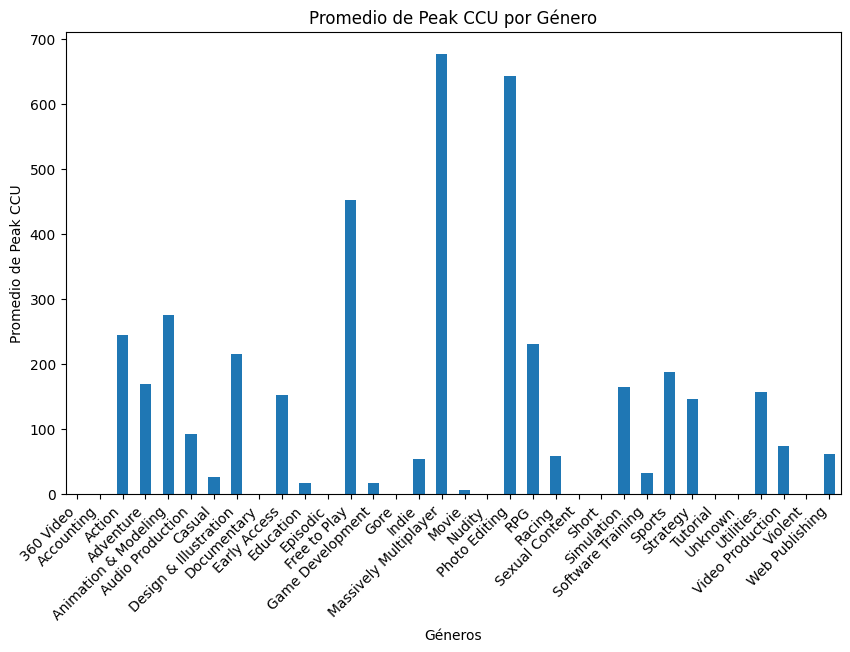

In [ ]:
#Separar los géneros y expandir el DataFrame
df_expanded = df.assign(Genres=df['Genres'].str.split(',')).explode('Genres')

#Eliminar espacios en blanco alrededor de los nombres de géneros
df_expanded['Genres'] = df_expanded['Genres'].str.strip()

#Calcular el promedio de Peak CCU por género
avg_peak_ccu_by_genre = df_expanded.groupby('Genres')['Peak CCU'].mean()

#Gráfico de barras
avg_peak_ccu_by_genre.plot(kind='bar', figsize=(10, 6))
plt.title('Promedio de Peak CCU por Género')
plt.xlabel('Géneros')
plt.ylabel('Promedio de Peak CCU')
plt.xticks(rotation=45, ha='right')
plt.show()

***El gráfico muestra una comparación visual del número promedio máximo de usuarios concurrentes (Peak CCU) para cada género de videojuegos. En otras palabras, nos muestra qué géneros de videojuegos suelen tener más jugadores conectados al mismo tiempo en su punto máximo de popularidad.***

* Es evidente que existe una gran disparidad en el número de jugadores concurrentes entre los diferentes géneros de videojuegos. Algunos géneros, como "Massively Multiplayer" (Masivamente Multijugador), tienen un promedio de Peak CCU significativamente más alto que otros, como "Accounting" (Contabilidad).

* Los géneros que presentan los promedios más altos de Peak CCU suelen ser aquellos que fomentan la interacción social y la competencia entre jugadores, como los juegos Massively Multiplayer Online (MMO) y los juegos de disparos.

**Una posible razon puede ser por:**

* Los juegos que requieren interacción social o competencia entre múltiples jugadores tienden a tener un mayor número de usuarios concurrentes.

* Los géneros más populares, como los juegos de acción o los RPG, atraen a un público más amplio y, por lo tanto, tienen un mayor número de jugadores.

* Los juegos gratuitos o los que ofrecen contenido adicional después del lanzamiento suelen tener un mayor número de jugadores concurrentes.

* La plataforma en la que se lanzan los juegos también puede influir en el número de jugadores concurrentes (por ejemplo, juegos para PC vs. juegos para consolas).

# **Promedio de Tiempo de Juego por Género de Videojuegos**

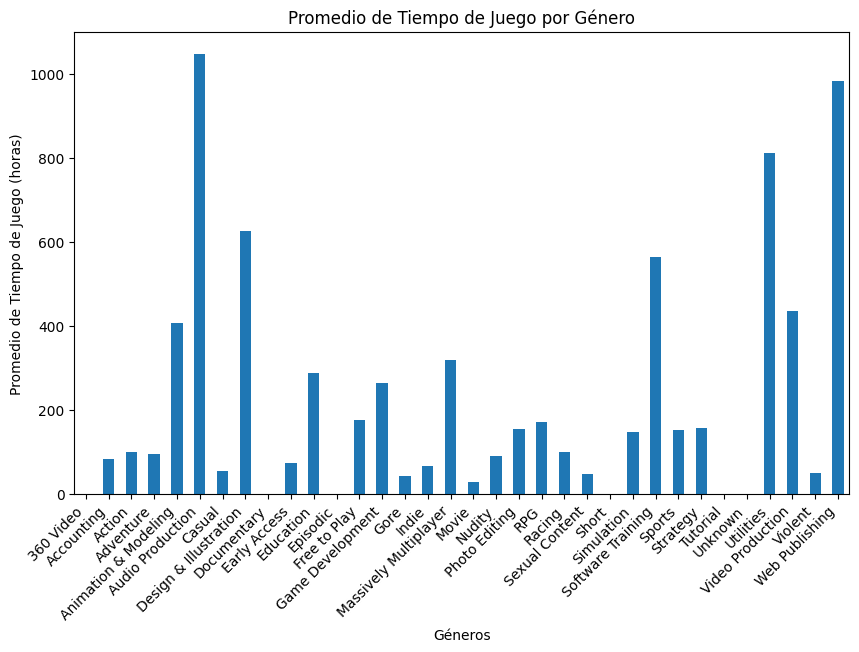

In [ ]:
#Separar los géneros y expandir el DataFrame
df_expanded = df.assign(Genres=df['Genres'].str.split(',')).explode('Genres')

#Eliminar espacios en blanco alrededor de los nombres de géneros
df_expanded['Genres'] = df_expanded['Genres'].str.strip()

#Calcular el promedio de Average playtime forever por género
avg_playtime_by_genre = df_expanded.groupby('Genres')['Average playtime forever'].mean()

#Gráfico de barras
avg_playtime_by_genre.plot(kind='bar', figsize=(10, 6))
plt.title('Promedio de Tiempo de Juego por Género')
plt.xlabel('Géneros')
plt.ylabel('Promedio de Tiempo de Juego (horas)')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Evolución del Promedio de User Score por Fecha de Lanzamiento**

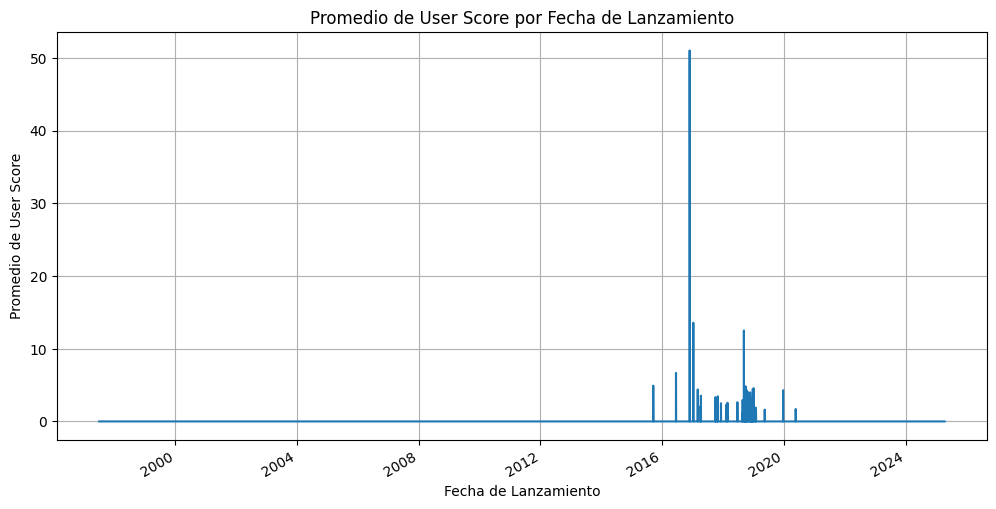

In [ ]:
#Filtrar valores NaT
df = df.dropna(subset=['Release date'])

#Calcular el promedio de User score por fecha de lanzamiento
avg_user_score_by_date = df.groupby('Release date')['User score'].mean()

#Gráfico de líneas
avg_user_score_by_date.plot(kind='line', figsize=(12, 6))
plt.title('Promedio de User Score por Fecha de Lanzamiento')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Promedio de User Score')
plt.grid(True)
plt.show()

# **Distribución del Precio y la Calificación de Usuarios en Videojuegos**

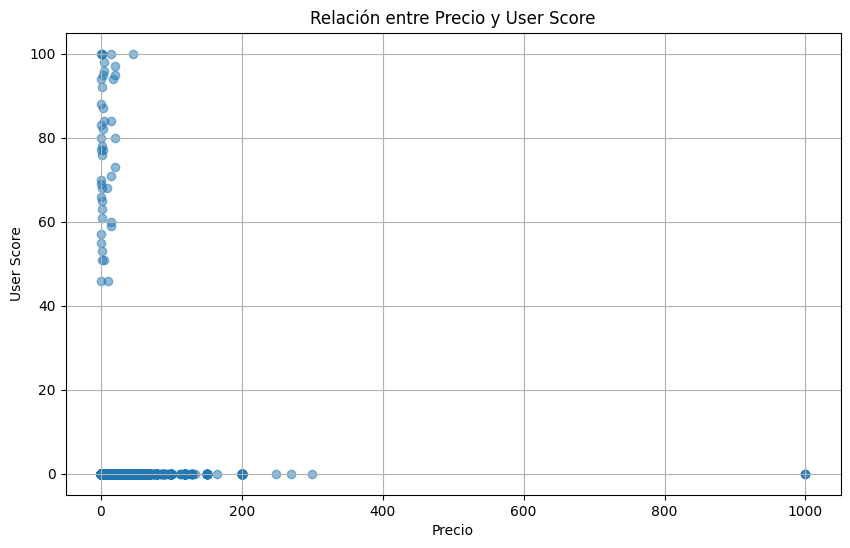

In [ ]:
#Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['User score'], alpha=0.5)
plt.title('Relación entre Precio y User Score')
plt.xlabel('Precio')
plt.ylabel('User Score')
plt.grid(True)
plt.show()

* No se aprecia una relación directa entre el precio de un juego y la calificación de los usuarios. Esto significa que un juego caro no necesariamente tiene una mejor calificación que uno barato, y viceversa.
* La mayoría de los juegos se encuentran en el rango de precios más bajos, con calificaciones que estan entre 0 y 200. Hay pocos juegos con precios muy altos y con calificaciones muy altas.
* Se observan algunos puntos aislados que representan juegos con precios muy altos o muy bajos, y calificaciones extremas. Estos casos podrían ser juegos muy populares o muy criticados, o incluso errores en los datos.

# **Ranking de los 10 Mejores Desarrolladores Según el Promedio de Metacritic**

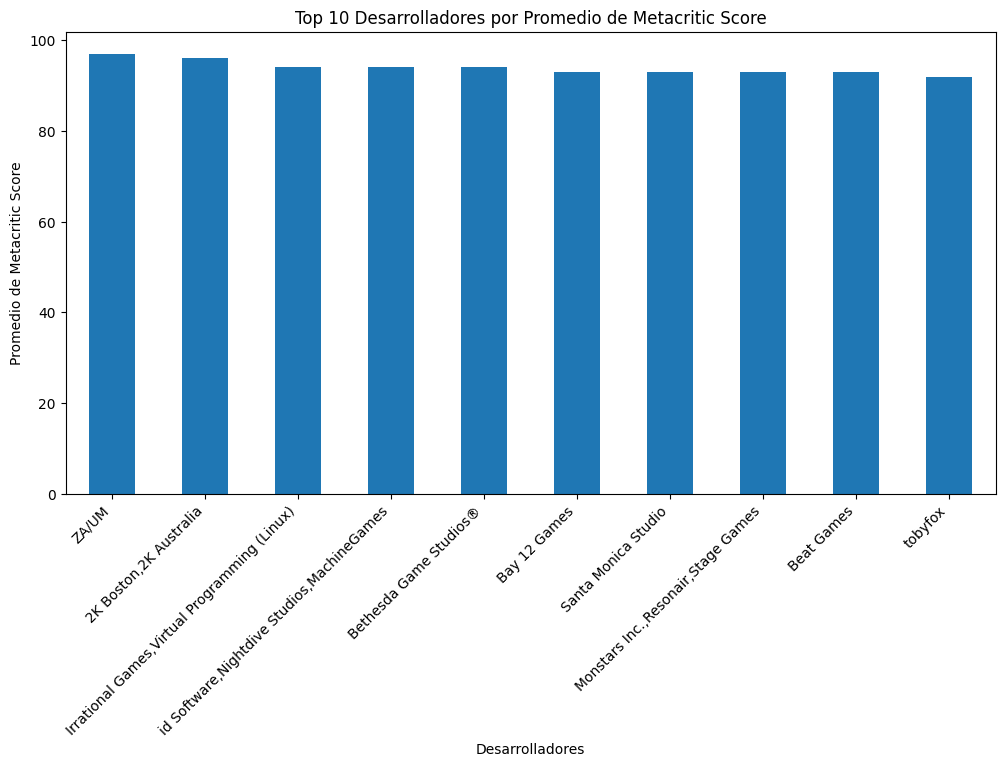

In [ ]:
#Calcular el promedio de Metacritic score por desarrollador
avg_metacritic_by_dev = df.groupby('Developers')['Metacritic score'].mean().sort_values(ascending=False).head(10)

#Gráfico de barras
avg_metacritic_by_dev.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Desarrolladores por Promedio de Metacritic Score')
plt.xlabel('Desarrolladores')
plt.ylabel('Promedio de Metacritic Score')
plt.xticks(rotation=45, ha='right')
plt.show()

***Este gráfico nos muestra una clasificación de los 10 desarrolladores de videojuegos con el promedio más alto de puntuación en Metacritic. Metacritic es un sitio web que recopila y promedia las reseñas de videojuegos de diferentes publicaciones y críticos especializados. Por lo tanto, esta gráfica nos indica cuáles son los estudios de desarrollo que, en promedio, han recibido las mejores críticas por sus juegos.***

* El gráfico muestra una amplia variedad de desarrolladores, desde estudios independientes como ZA/UM hasta grandes estudios como Bethesda Game Studios.

* Todos los desarrolladores incluidos en el gráfico tienen un promedio de puntuación de Metacritic muy alto, lo que sugiere que producen juegos de alta calidad y bien recibidos por la crítica.

* El hecho de que estos estudios se encuentren en la cima de esta clasificación indica el alto nivel de competencia en la industria de los videojuegos y la búsqueda constante de la excelencia por parte de los desarrolladores.

> ¿Por qué es importante esta información?

****Para los jugadores: Al conocer los desarrolladores con las mejores calificaciones, los jugadores pueden tomar decisiones más informadas sobre qué juegos comprar.****

****Para la industria: Esta información puede servir como un punto de referencia para los desarrolladores, indicando qué estudios están a la vanguardia en términos de calidad y creatividad.****

****Para los críticos: Los datos de Metacritic pueden ayudar a los críticos a contextualizar sus propias reseñas y a identificar tendencias en la industria de los videojuegos.****

# **Comparación de Juegos Gratuitos vs Pagos a lo Largo del Tiempo**

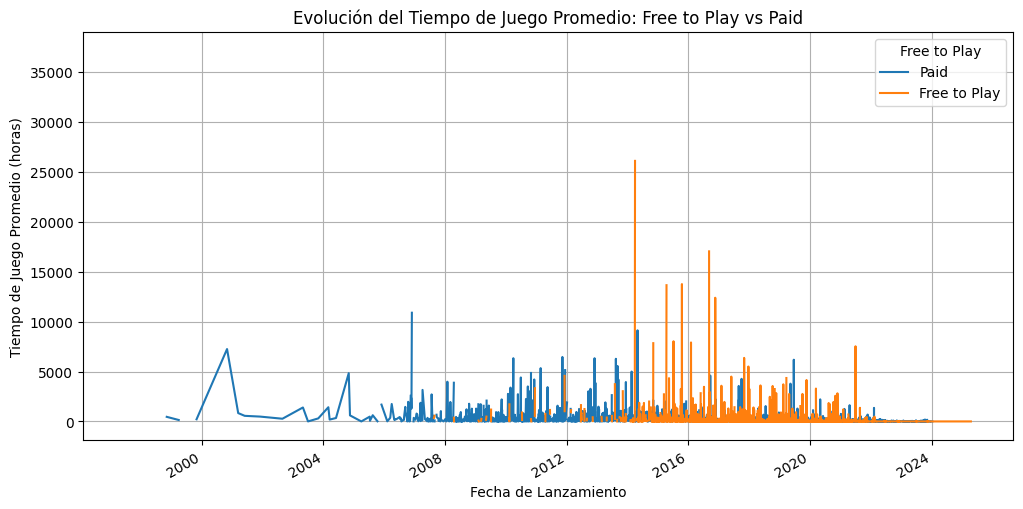

In [ ]:

df['Is Free to Play'] = df['Price'] == 0

# Calcular el promedio de fecha de lanzamiento y tiepo de juego
avg_playtime_by_date = df.groupby(['Release date', 'Is Free to Play'])['Average playtime forever'].mean().unstack()

# Gráfico de líneas
avg_playtime_by_date.plot(kind='line', figsize=(12, 6))

# Personalizacion de gráfico
plt.title('Evolución del Tiempo de Juego Promedio: Free to Play vs Paid')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Tiempo de Juego Promedio (horas)')
plt.legend(title='Free to Play', labels=['Paid', 'Free to Play'])
plt.grid(True)
plt.show()

***La gráfica muestra una comparación visual entre el tiempo promedio de juego de videojuegos gratuitos (Free to Play) y de pago (Paid) a lo largo del tiempo, desde principios del año 2000 hasta 2024.***

* Tanto los Videojuegos gratuitos como los de pago presentan una alta variedad en el tiempo de juego a lo largo de los años. Esto sugiere que diversos factores, como la popularidad de géneros, lanzamientos de grandes títulos o cambios en las mecánicas de juego, pueden influir significativamente con tiempo que los jugadores dedican a cada tipo de Videojuego.
* Hay tendencia general, en la subida con el tiempo de juego, especialmente para los juegos gratuitos. Esto podría indicar que los desarrolladores de juegos gratuitos están implementando estrategias cada vez más efectivas para mantener a los jugadores enganchados.

**En Resumen la gráfica sugiere que los videojuegos están siendo más populares y que los modelos de negocio gratuitos están teniendo un gran impacto en los hábitos de juego de las personas.**

# **Precio vs Cantidad de DLCs**

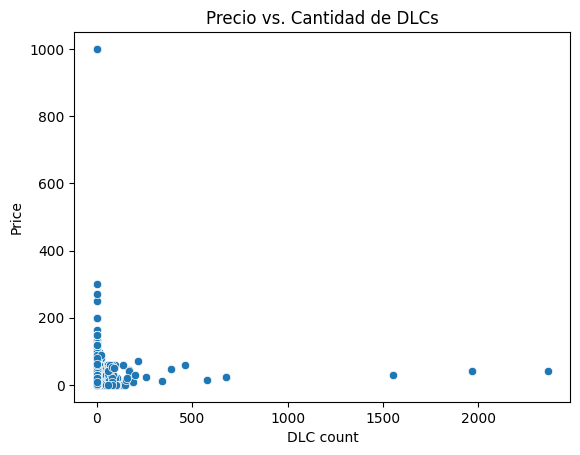

In [ ]:
sns.scatterplot(data=df, x='DLC count', y='Price')
plt.title('Precio vs. Cantidad de DLCs')
plt.show()

***El gráfico muestra una relación entre dos variables: la cantidad de contenidos descargables (DLC) de un videojuego y su precio. Cada punto en el gráfico representa un videojuego, donde la posición horizontal indica la cantidad de DLCs que tiene y la posición vertical indica su precio.***

* A primera vista, se observa una tendencia general a que los juegos con menos DLCs tienden a ser más baratos. Esto sugiere una correlación negativa entre la cantidad de DLCs y el precio base del juego.

* es importante notar que esta relación no es perfecta. Existen muchos juegos con pocos DLCs que tienen un precio alto, y viceversa.



In [ ]:
game_count_by_developer = df['Developers'].value_counts()
print(game_count_by_developer)

Developers
Unknown                     3587
Choice of Games              154
Creobit                      138
Laush Dmitriy Sergeevich     138
EroticGamesClub              119
                            ... 
WAEUN                          1
Meow Games                     1
rongyou                        1
DracoSoftware, LLC             1
MCA                            1
Name: count, Length: 49871, dtype: int64


In [ ]:
    #Tranformacion a INT. (True: 1, False: 0)

df['Windows'] = df['Windows'].astype(int)
df['Mac'] = df['Mac'].astype(int)
df['Linux'] = df['Linux'].astype(int)

# **Cantidad de juegos por sistema operativo**

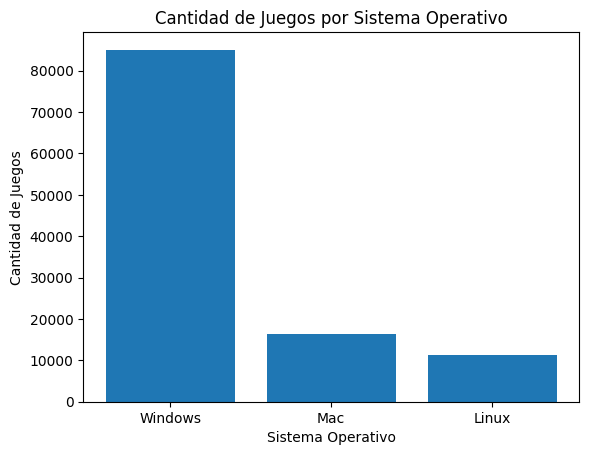

In [ ]:
counts = df[['Windows', 'Mac', 'Linux']].sum()

# Gráfico de barras
plt.bar(counts.index, counts.values)
plt.xlabel('Sistema Operativo')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos por Sistema Operativo')
plt.show()

***El gráfico muestra de manera clara la distribución de juegos entre los tres sistemas operativos más populares: Windows, Mac y Linux.***
* Es evidente que Windows es el sistema operativo con mayor cantidad de juegos disponibles. Esta barra es significativamente más alta que las de Mac y Linux, lo que indica una preferencia general de los desarrolladores por esta plataforma.

* Mac ocupa el segundo lugar en cuanto a cantidad de juegos disponibles. Si bien la diferencia con Windows es notable, sigue siendo una plataforma popular para los jugadores.

* Linux presenta la menor cantidad de juegos disponibles entre los tres sistemas operativos. Esto puede deberse a varios factores, como una base de usuarios más reducida o a desafíos técnicos específicos para el desarrollo de juegos en esta plataforma.



# **Reseñas por Género**

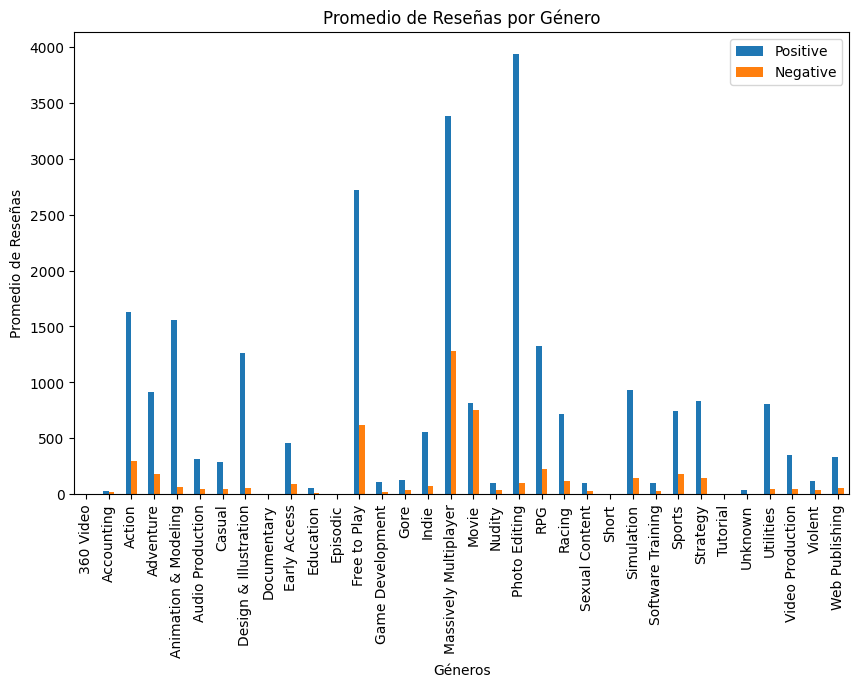

In [ ]:
# Calcular el promedio de reseñas por género
avg_reviews_by_genre = df_expanded.groupby('Genres')[['Positive', 'Negative']].mean()

# Gráfico de barras
avg_reviews_by_genre.plot(kind='bar', figsize=(10, 6))
plt.title('Promedio de Reseñas por Género')
plt.xlabel('Géneros')
plt.ylabel('Promedio de Reseñas')
plt.show()

****El gráfico muestra una comparación visual entre el promedio de reseñas positivas y negativas para una amplia variedad de géneros de videojuegos. Cada barra representa un género específico, y la altura de las barras indica el promedio de reseñas positivas y negativas que ha recibido ese género.****

* Es evidente que existe una gran disparidad en la cantidad promedio de reseñas, tanto positivas como negativas, entre los diferentes géneros de videojuegos

* En general, la mayoría de los géneros presentan un mayor promedio de reseñas positivas en comparación con las negativas. Esto sugiere que, en promedio, los jugadores tienden a tener una experiencia más positiva con los videojuegos.

* El gráfico permite observar la relación entre las reseñas positivas y negativas para cada género. En algunos casos, existe una correlación positiva, lo que significa que los géneros con un alto número de reseñas positivas también tienden a tener un mayor número de reseñas negativas. Sin embargo, esta relación no es siempre evidente

# **Promedio de Reseñas Positivas por Género**

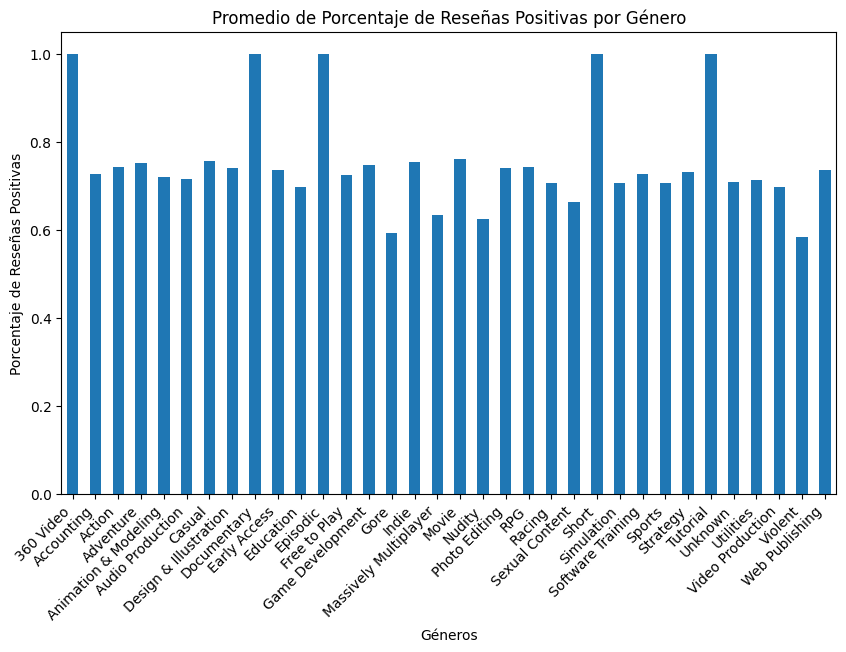

In [ ]:
# Calcular el porcentaje de reseñas positivas
df_expanded['Positive_ratio'] = df_expanded['Positive'] / (df_expanded['Positive'] + df_expanded['Negative'])

# Calcular el promedio de porcentaje de reseñas positivas por género
avg_positive_ratio_by_genre = df_expanded.groupby('Genres')['Positive_ratio'].mean()

# Gráfico de barras
avg_positive_ratio_by_genre.plot(kind='bar', figsize=(10, 6))
plt.title('Promedio de Porcentaje de Reseñas Positivas por Género')
plt.xlabel('Géneros')
plt.ylabel('Porcentaje de Reseñas Positivas')
plt.xticks(rotation=45, ha='right')
plt.show()

****El gráfico muestra una comparación visual del porcentaje promedio de reseñas positivas para una amplia variedad de géneros de videojuegos.****

* El gráfico abarca un espectro muy amplio de géneros, desde los más convencionales como Acción y RPG, hasta otros más especializados

* Es evidente que la percepción de los jugadores varía significativamente entre los diferentes géneros. Algunos géneros, como RPG y Acción, tienden a tener un porcentaje más alto de reseñas positivas, mientras que otros, como Gore o Sexual Content, suelen tener un porcentaje más bajo.

* El gráfico sugiere que el género de un videojuego puede ser un factor determinante en la satisfacción de los jugadores.

In [ ]:
print(df.columns)

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Age_category',
       'Is Free to Play'],
      dtype='object')


In [ ]:
# Asumiendo que 'Genres' ya está en un formato similar a 'Casual, Indie, Sports'
df['Genres'] = df['Genres'].str.split(',')

# Crear variables dummies para los géneros
df_genres = df['Genres'].str.join('|').str.get_dummies()

# Concatenar las columnas de géneros con el dataframe original
df = pd.concat([df, df_genres], axis=1)

# Ahora puedes eliminar la columna original 'Genres' si no la necesitas más
df = df.drop(columns=['Genres'])

# Convertir la columna 'Release date' a solo el año
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year

# Verificar si existen valores nulos en 'Release date' y eliminarlos o llenarlos con un valor como la mediana
df['Release date'] = df['Release date'].fillna(df['Release date'].median())

# Seleccionamos las características que vamos a usar para entrenar el modelo
X = df[['Price', 'Average playtime forever', 'Release date', 'DLC count'] + list(df_genres.columns)]

# Definir la columna objetivo (si los juegos son gratis o pagados)
# Dado que no tienes una columna explícita 'Free or Paid', podríamos basarnos en el precio
# Consideremos que si el precio es 0, el juego es gratuito
y = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid')

# Convertir la columna objetivo 'Free or Paid' a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train y y_train están listos para los modelos de clasificación

**Géneros (Genres):** Se utiliza One-Hot Encoding para transformar los géneros en columnas binarias, donde cada columna representa un género específico con valores de 0 o 1.

**Fecha de lanzamiento (Release date):** Se extrae el año de la fecha de lanzamiento y se reemplazan los valores nulos con la mediana del año.

**Precio (Price):** Se clasifica el precio en dos categorías: "gratis" (Free) o "pagados" (Paid). Se crea una nueva variable para esta clasificación.

**X (Datos para el modelo):** Incluye columnas relevantes como el tiempo de juego (Average playtime forever), el número de DLCs (DLC count), el precio y las columnas de géneros.

# KNN

In [ ]:
# Estandarización (para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos
knn_model.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Modelo KNN
# Entrenamiento de KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)

# Evaluación
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9642794195405675
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3256
           1       0.97      0.99      0.98     13765

    accuracy                           0.96     17021
   macro avg       0.95      0.93      0.94     17021
weighted avg       0.96      0.96      0.96     17021



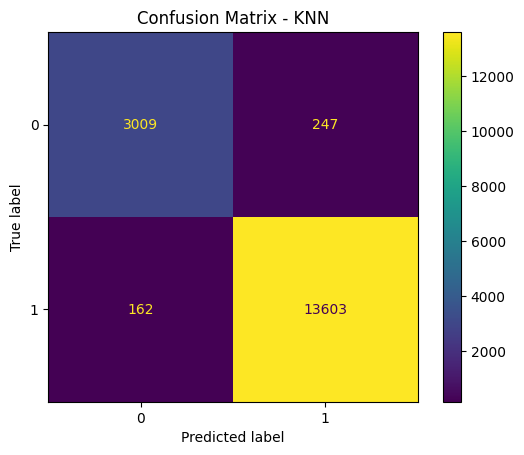

In [ ]:
# Para KNN
y_pred_knn = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot()
plt.title('Confusion Matrix - KNN')
plt.show()

# Random Forest

In [ ]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Modelo Random Forest
# Entrenamiento de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluación
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3256
           1       1.00      1.00      1.00     13765

    accuracy                           1.00     17021
   macro avg       1.00      1.00      1.00     17021
weighted avg       1.00      1.00      1.00     17021



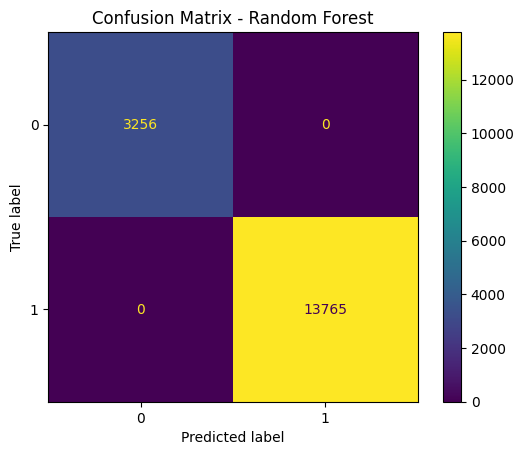

In [ ]:
# Generar matriz de confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

# XGBoost

In [ ]:
# Inicializar y entrenar XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3256
           1       1.00      1.00      1.00     13765

    accuracy                           1.00     17021
   macro avg       1.00      1.00      1.00     17021
weighted avg       1.00      1.00      1.00     17021



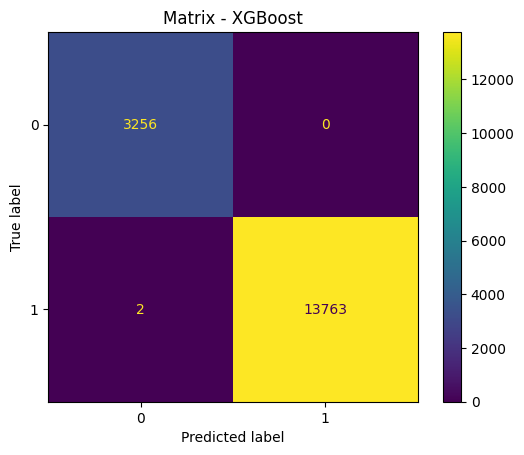

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot()
plt.title('Matrix - XGBoost')
plt.show()

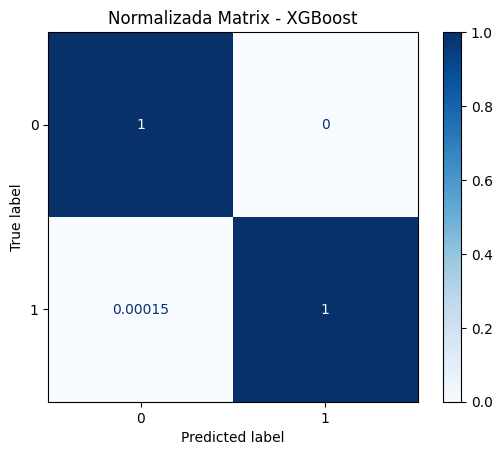

In [ ]:
# Matriz de confusión normalizada
cm_xgb_normalized = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis]
disp_xgb_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_normalized, display_labels=xgb_model.classes_)
disp_xgb_normalized.plot(cmap=plt.cm.Blues)
plt.title('Normalizada Matrix - XGBoost')
plt.show()

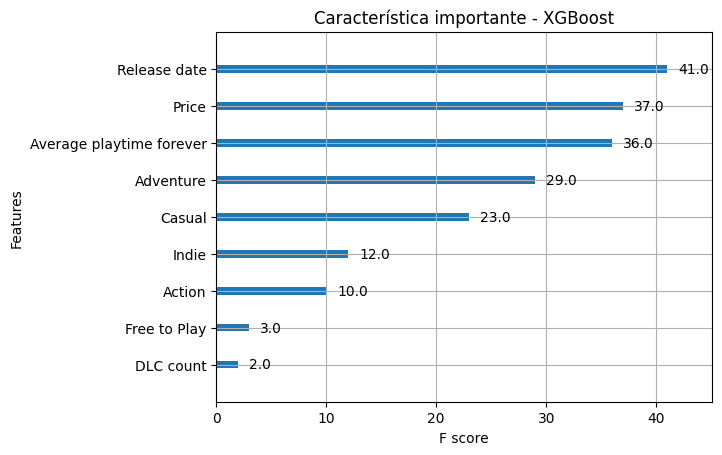

In [ ]:
# Visualizar importancia de características
xgb.plot_importance(xgb_model, importance_type='weight')
plt.title('Característica importante - XGBoost')
plt.show()

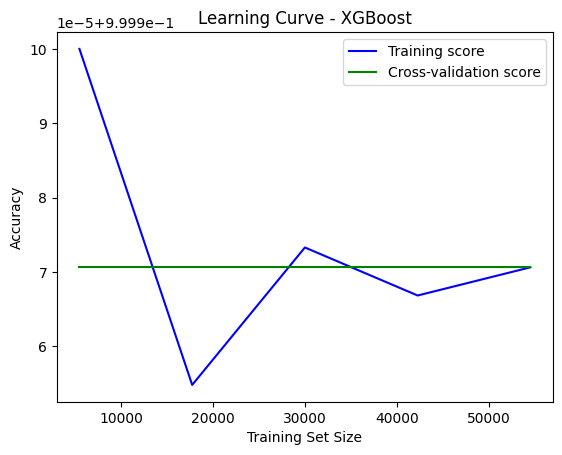

In [ ]:
# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")

plt.title("Learning Curve - XGBoost")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Regresión Logística

In [ ]:
# Aumentar el número de iteraciones
log_reg = LogisticRegression(max_iter=1000)  # Aumenta el número de iteraciones
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


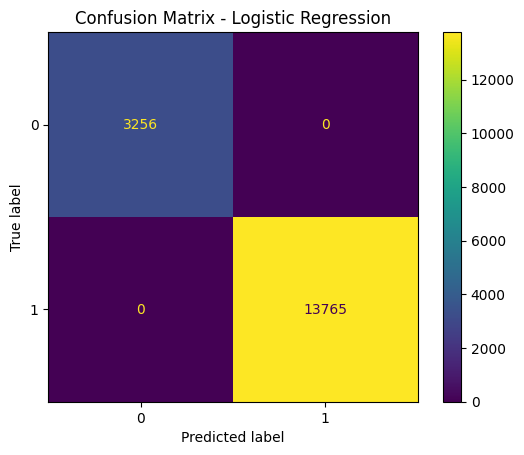

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3256
           1       1.00      1.00      1.00     13765

    accuracy                           1.00     17021
   macro avg       1.00      1.00      1.00     17021
weighted avg       1.00      1.00      1.00     17021



In [ ]:
# Entrenamiento del modelo de Regresión Logística
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_logreg = logreg_model.predict(X_test)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp_logreg.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print(classification_report(y_test, y_pred_logreg))

# AdaBoost

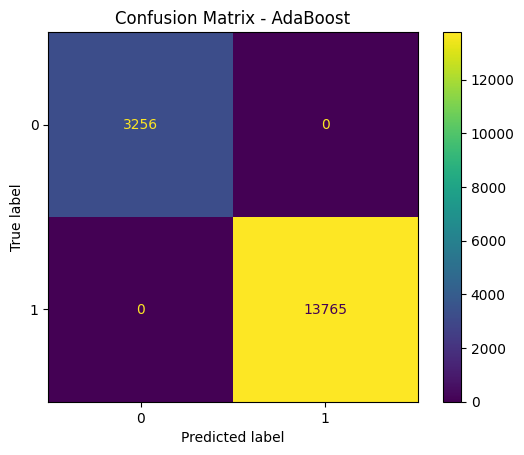

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3256
           1       1.00      1.00      1.00     13765

    accuracy                           1.00     17021
   macro avg       1.00      1.00      1.00     17021
weighted avg       1.00      1.00      1.00     17021



In [ ]:
# Entrenamiento del modelo AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_ada = ada_model.predict(X_test)
cm_ada = confusion_matrix(y_test, y_pred_ada)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada)
disp_ada.plot()
plt.title('Confusion Matrix - AdaBoost')
plt.show()

print(classification_report(y_test, y_pred_ada))

# Gradient Boosting

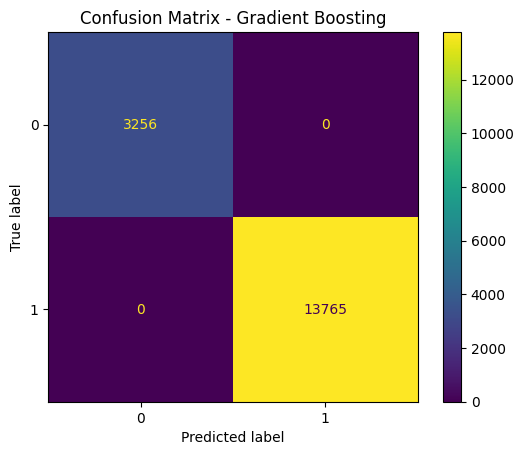

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3256
           1       1.00      1.00      1.00     13765

    accuracy                           1.00     17021
   macro avg       1.00      1.00      1.00     17021
weighted avg       1.00      1.00      1.00     17021



In [ ]:
# Entrenamiento del modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_gb = gb_model.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

print(classification_report(y_test, y_pred_gb))

# SVM

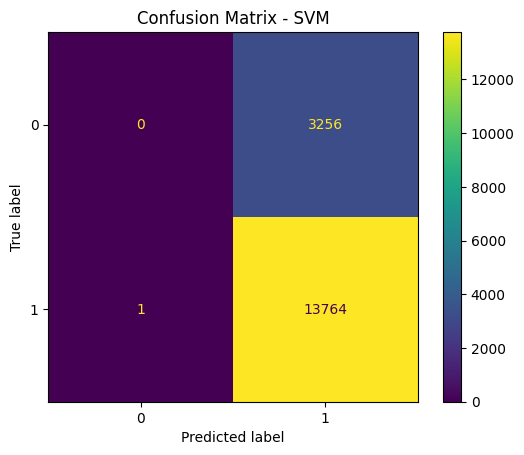

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3256
           1       0.81      1.00      0.89     13765

    accuracy                           0.81     17021
   macro avg       0.40      0.50      0.45     17021
weighted avg       0.65      0.81      0.72     17021



In [ ]:
# Entrenamiento del modelo SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_svm = svm_model.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title('Confusion Matrix - SVM')
plt.show()

print(classification_report(y_test, y_pred_svm))

In [ ]:
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")

SVM Accuracy: 0.8086481405322836
AdaBoost Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Gradient Boosting Accuracy: 1.0
KNN Accuracy: 0.9759708595264673
Random Forest Accuracy: 1.0
XGBoost Accuracy: 0.9998824980905939


Modelos utilizados:

*   SVM
*   Logistic Regression
*   Gradient Boosting
*   KNN (K-Nearest Neighbors)
*   Random Forest
*   XGBoost

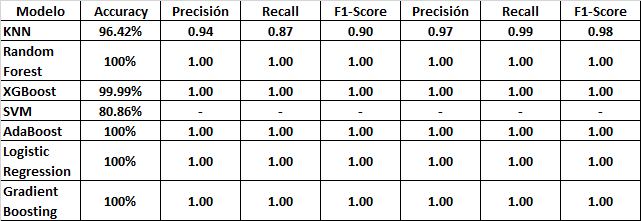

**KNN:**

*   Precisión: 96.42%

*   F1-Score: Elevado para ambas clases (juegos gratuitos y de pago).

*   Comentario: Aunque no alcanza la precisión de otros modelos avanzados, sigue siendo una opción adecuada para datos relativamente simples y si se necesita una implementación rápida y efectiva.

**Random Forest:**

*   Precisión: 100%

*   F1-Score: Perfecto en todas las métricas.

*   Comentario: El rendimiento de Random Forest es excelente, con una precisión perfecta. Es altamente robusto, especialmente cuando se busca estabilidad y manejar datos complejos de manera efectiva.

**XGBoost:**

*   Precisión: 99.99%

*   F1-Score: Perfecto o cercano al perfecto.

*   omentario: XGBoost ofrece resultados comparables a Random Forest, pero con la ventaja de ser más flexible y ajustable. Es ideal para conjuntos de datos complejos, especialmente cuando se requiere un control detallado en la optimización.

**SVM (Support Vector Machine):**

*   Precisión: 80.86%

*   Comentario: Aunque SVM no alcanza el nivel de precisión de Random Forest o XGBoost, sigue siendo una opción sólida, especialmente para conjuntos de datos más pequeños o menos complejos. Sin embargo, en este caso, parece ser menos efectivo en comparación con los otros modelos.

**AdaBoost:**

*   Precisión: 100%

*   Comentario: AdaBoost logró una precisión perfecta, lo que lo convierte en una excelente opción si se busca un modelo basado en boosting que sea fácil de ajustar y entrene rápidamente. Sin embargo, puede ser menos flexible que XGBoost en ciertos escenarios.

**Logistic Regression:**

*   Precisión: 100%

*   Comentario: La regresión logística también obtuvo una precisión perfecta, lo cual es sorprendente dado que se trata de un modelo más simple. Esto sugiere que el conjunto de datos es linealmente separable o que los juegos gratuitos y de pago están claramente diferenciados.

**Gradient Boosting:**

*   Precisión: 100%

*   Comentario: Gradient Boosting, al igual que XGBoost, logró una precisión perfecta. Este modelo es otra opción excelente para datos complejos y es una alternativa altamente competitiva a XGBoost en cuanto a precisión y flexibilidad.


# **Conclusión final:**

*   Modelos con precisión perfecta: Random Forest, AdaBoost, Logistic Regression y Gradient Boosting alcanzaron el 100% de precisión, lo que los convierte en opciones muy recomendables para este conjunto de datos. La elección entre ellos dependerá más de factores como el tiempo de entrenamiento, interpretabilidad, o necesidades específicas de ajuste.

*   XGBoost: Con un 99.99% de precisión, sigue siendo una opción preferible si se busca un modelo que permita más control en la optimización, aunque su ventaja sobre Gradient Boosting y AdaBoost es mínima.

*   KNN y SVM: Estos modelos, aunque tienen menor precisión, podrían ser útiles en casos donde la simplicidad y la eficiencia sean prioritarios o cuando no se requiera precisión perfecta. KNN es rápido de implementar, mientras que SVM podría funcionar mejor en conjuntos de datos más pequeños o menos complejos.

**En resumen, XGBoost, Random Forest, Gradient Boosting, y AdaBoost son los modelos más recomendados para maximizar la precisión en este conjunto de datos, con Logistic Regression como una opción sorprendentemente buena. Si los recursos o el tiempo de entrenamiento son limitados, KNN o SVM pueden ser alternativas viables.**





